In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

# Simple Linear Regression

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

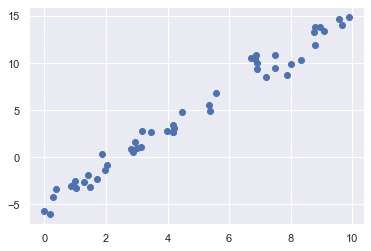

In [6]:
# if same random state is used output same results
rng = np.random.RandomState(1)
#   0-1

#rand -> 50 numbers
x = 10 * rng.rand(50)

#rand from standard normal distribution
#adding noise to data 
y = 2 * x - 5 + rng.randn(50)

plt.scatter(x, y);

We can use Scikit-Learn's LinearRegression estimator to fit this data and construct the best-fit line:


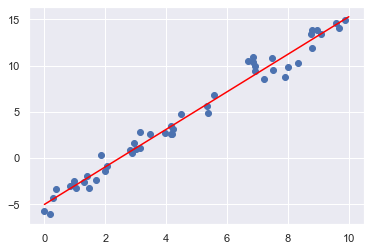

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

# np.newaxis  -> (50,1) creates shape
model.fit(x[:, np.newaxis], y)

#generate new data
xfit = np.linspace(0, 10, 1000)

#give xfit as x
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)

#plot ->connect
plt.plot(xfit, yfit,color='red');

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore. Here the relevant parameters are coef_ and intercept_:

In [14]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.027208810360695
Model intercept: -4.998577085553202


We see that the results are very close to the inputs, as we might hope.

The LinearRegression estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$where there are multiple $x$ values. Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

In [19]:
rng = np.random.RandomState(45)

# 100 numbers and 3 columns
X = 10 * rng.rand(100, 3)

# multiply the factors - Dot product of two arrays.
y = 0.5 + np.dot(X, [1.5, -2., 1.])

# x(100,3) and y(prediction) ->(100,1)
model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000044
[ 1.5 -2.   1. ]



Here the $y$ data is constructed from three random $x$ values, and the linear regression recovers the coefficients used to construct the data.

In this way, we can use the single LinearRegression estimator to fit lines, planes, or hyperplanes to our data. It still appears that this approach would be limited to strictly linear relationships between variables, but it turns out we can relax this as well.

